<a href="https://colab.research.google.com/github/nairaanish/CAT_DOG_CLASSIFIER/blob/master/FCM_Devadoss_On_ISEC_and_Additive_Combination/Methodology_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORTING THE NECESSARY LIBRARIES

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
#import seaborn as sns
import os, re, json, csv
#import igraph as ig
import networkx as nx
import pprint


%matplotlib inline 
from pylab import rcParams
rcParams['figure.figsize'] = 7,4 # Bigger figures
rcParams['lines.linewidth'] = 2.0
rcParams.update({'font.size': 25}) # Bigger text (for labels)
#from warnings import filterwarnings #filterwarnings('ignore')

## DEFINING REQUIRED FUNCTIONS

In [ ]:
def FixedPointList(func, arg, nmax = 1000):
    tmp_lst = [func(arg)]
    tmp_lst = tmp_lst + [func(tmp_lst[-1])]
    while ( (len(tmp_lst)==len(set(tmp_lst))) & (len(tmp_lst) < nmax) ):
        tmp_lst = tmp_lst + [func(tmp_lst[-1])]
    return(tmp_lst)

def FixedPoint(func, arg, nmax = 1000):
    return( FixedPointList(func, arg, nmax)[-1] )

def NestWhileList(func, arg, stopTestQ, nmax = 1000):
    # stopTestQ takes full FP list to calc stop flag. stop when True
    tmp_lst = [func(arg)]
    tmp_lst = tmp_lst + [func(tmp_lst[-1])]
    while ( not(stopTestQ(tmp_lst)) & (len(tmp_lst) < nmax) ):
        tmp_lst = tmp_lst + [func(tmp_lst[-1])]
    return([list(t) for t in tmp_lst])


In [ ]:
S = lambda x: 1*(x>=0.5) 
#S = lambda x: 1/(1+np.exp(-(9*x-3)))
# delayed unitstep activation function... 
# generalize later: non-decreasing bijections on the unit interval

def Clamp(actvn, mask):
    assert(len(actvn) == len(mask))
    clamped = actvn
    clamped[ [j for j in range(len(mask)) if mask[j]==1] ] = 1
    clamped[ [j for j in range(len(mask)) if mask[j]<0] ] = 0
    return clamped

def dec2binList(x):
    return [int(k) for k in list(bin(x)[2:])]

def ClampIntInt(actvn, on, off):
    return Clamp(actvn, dec2binList(on), dec2binList(off))

def FCMPass(grph, inp, mask):
    assert(len(inp) == len(mask))
    return Clamp( S(
            np.asarray(np.matmul(Clamp(inp, mask), nx.adjacency_matrix(grph).todense())).ravel()
        ), mask)

In [ ]:
def stopcritQ(res_lst):
    res_lst = [str(t) for t in res_lst]
    return( len(set(res_lst))!=len(res_lst) )

def FCMEvolSeq(grph, inp, mask, nmax = 1000):
    assert(len(inp) == len(mask))
    seq = NestWhileList(
        lambda inp_vec: FCMPass(grph, inp_vec, mask),
        inp, stopcritQ, nmax
    )
    seq = [inp] + seq
    return(np.matrix(seq))


## CLUSTER 1 

[[0 1 1 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 1 1 0]]


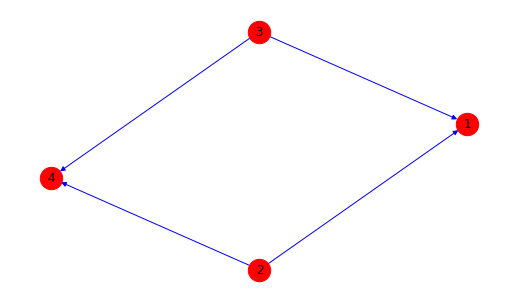

In [ ]:
alist = [(2,1,1),(2,4,1),
         (3,1,1), (3,4,1)
         ]
apath = nx.DiGraph()
apath.add_weighted_edges_from(alist)
nx.draw(apath, node_size=500, with_labels=True, node_color='r', edge_color='b')
apthdmat = nx.adjacency_matrix(apath).todense()
print (apthdmat)

## CLUSTER 2

[[0 1 0]
 [0 0 0]
 [0 1 0]]


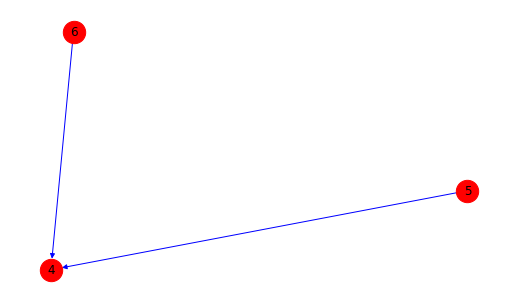

In [ ]:
blist = [(5,4,1),
         (6,4,1)
        ]
bpath = nx.DiGraph()
bpath.add_weighted_edges_from(blist)
nx.draw(bpath, node_size=500, with_labels=True, node_color='r', edge_color='b')
bpthdmat = nx.adjacency_matrix(bpath).todense()
print (bpthdmat)

## CLUSTER 3

[[0 1 0 0]
 [0 0 0 0]
 [0 1 0 0]
 [0 1 0 0]]


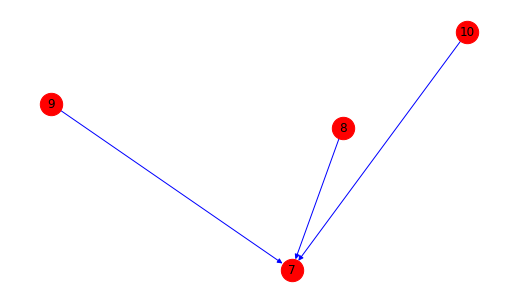

In [ ]:
clist = [(8,7,1),
         (10,7,1),
         (9,7,1)
        ]
cpath = nx.DiGraph()
cpath.add_weighted_edges_from(clist)
nx.draw(cpath, node_size=500, with_labels=True, node_color='r', edge_color='b')
cpthdmat = nx.adjacency_matrix(cpath).todense()
print (cpthdmat)

## CLUSTER 4

[[0 1 0 0]
 [0 0 0 0]
 [0 1 0 0]
 [0 1 0 0]]


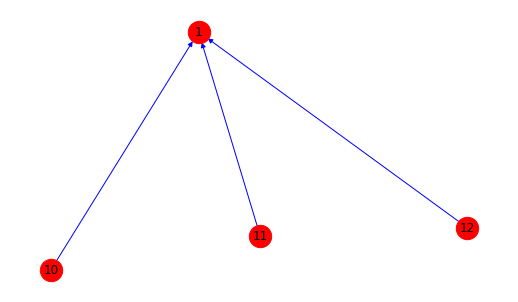

In [ ]:
dlist = [(10,1,1),
         (11,1,1),
         (12,1,1)
        ]
dpath = nx.DiGraph()
dpath.add_weighted_edges_from(dlist)
nx.draw(dpath, node_size=500, with_labels=True, node_color='r', edge_color='b')
dpthdmat = nx.adjacency_matrix(cpath).todense()
print (dpthdmat)

## COBFCM

[[0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]]


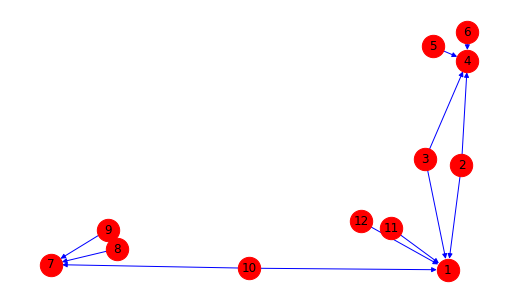

In [ ]:
finlist = [ (2,1,1),(2,4,1),
            (3,1,1), (3,4,1),
            (5,4,1),
            (6,4,1),
            (8,7,1),
            (10,7,1),
            (9,7,1),
            (10,1,1),
            (11,1,1),
            (12,1,1)
          ]
finpath = nx.DiGraph()
finpath.add_weighted_edges_from(finlist)
nx.draw(finpath, node_size=500, with_labels=True, node_color='r', edge_color='b')
finpthdmat = nx.adjacency_matrix(finpath).todense()
print (finpthdmat)

In [ ]:
l = 0  
m=0
A = [[0, 0, 0, 0 ,0, 0, 0, 0, 0, 0, 0, 0]]
res=[0,0,0,0,0,0,0,0,0,0,0,0]
for l in range(len(A)):
    for j in range(len(A[0])): 
        A = [[0, 0, 0, 0 ,0, 0, 0, 0, 0, 0, 0, 0]]
        A[l][j]=1

        B = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
             [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
             [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
             [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

        result = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


        while(1):
            temp=[row[:] for row in A]
            
            # iterating by row of A 
            for i in range(len(A)): 
                
                # iterating by coloum by B 
                for j in range(len(B[0])): 
                    
                    # iterating by rows of B 
                    for k in range(len(B)): 
                        result[i][j] += A[i][k] * B[k][j]
                        
                        
            for i in range(len(A)):
                for j in range(len(A[0])):
                    A[i][j]=(A[i][j]+result[i][j])
                    
    
            for i in range(len(A)):
                for j in range(len(A[0])):
                    if(A[i][j]>1):
                        A[i][j]=1


    
            if(temp == A):
                print(temp)
                count=0
                for k in range(len(temp[0])):
                    if(temp[0][k]==1):
                        count+=1
                res[m]=count  
                m+=1
                break
            else:
                continue
print("")
print(res)

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
[[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]]
[[1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]]
[[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]]
[[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]]
[[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]]
[[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]]
[[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]]
[[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]]
[[1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]]
[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]]
[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]

[1, 3, 3, 1, 2, 2, 1, 2, 2, 3, 2, 2]
